# Part II - Prosper Loan Dataset
## by Mark Amir Anwar 

## Investigation Overview
> The research comprehensively studied the Prosper Loan Dataset, analyzing borrower behavior, loan performance, and risk estimation. The goal was to understand lending behavior and establish variables that affect loan approval, interest charges, and defaults.

> Key Takeaways:
1. Job Status and Income: Full-time employees had improved loan conditions, but rising income alone wasn’t necessarily linked to lower interest rates. Lenders likely consider other risk factors.

2. Debt-to-Income Ratio: A higher ratio didn’t always lead to higher interest rates, indicating that lenders use multiple factors when assessing risk.

3. Loan Status & Investor Trends: Settled loans attracted more investors, while charged-off or defaulted loans had fewer, suggesting investors favor safer options.

4. Borrower APR Trends: Interest rates showed multiple peaks instead of a smooth distribution, implying that borrowers are categorized into predefined risk groups.

5. Estimated Loss & Return: A negative correlation was observed—higher estimated losses were linked to lower returns, highlighting high-risk, low-reward loans.

> This study reveals that loan approvals and interest rates depend on a variety of factors beyond just income and employment. Lenders use risk profiles to categorize borrowers into different tiers, which ultimately influence their loan terms. Borrowers can leverage these insights to make smarter financial decisions, while lenders can refine their risk assessment strategies. Future research could explore how credit scores and loan conditions interact with these variables to gain deeper insights into loan performance.

## Dataset Overview and Executive Summary

>  The **Prosper Loan Dataset** is a financial dataset of **America’s first peer-to-peer lending marketplace** which is **Prosper Marketplace**, which has funded loans above $23 billion. This dataset is quite helpful for  learning more about how people borrow money, what is the loan performance, and what are the borrower’s  characteristics. It has 81 columns of **925 million data piece**. 
 
> This dataset provides details such as: **Borrower Employment Status, Loan Closed Date, Loan  status, and Loan Duration.** This dataset is quite effective in examining **loan repayment behavior, risk evaluation and  identifying trends in financial peer-to-peer lending.**   

> The time that has been spent on this dataset is  used to **gain understanding of borrower reliability and to find new strategies that can help in avoiding loan failure or loan escape.** All in all, this data set can be used as a real-world financial analysis.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

## (Visualization 1)

> From the following histogram of the column `AmountDelinquent` we observed that the histogram is **Left Skewed** so this means that most delinquent amounts are relatively small and do not reach extremely higher values (< 10,0000 dollars) morever, we can observe that the delinquents repeat with high values so this needs higher strict measures to avoid losses, even if they are minor. <br>
Another thing that was noticed is that the percentage of delinquents debts can be predicted because it falls within a specific range, and of course there can be a number of outliers we can't observe. 

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000')])

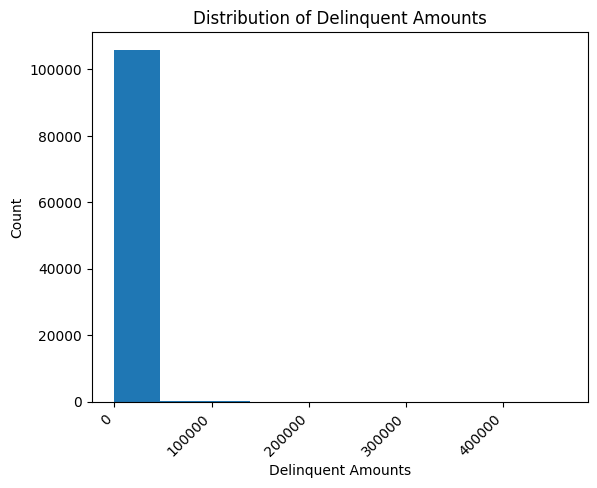

In [5]:
plt.hist(df["AmountDelinquent"])

plt.title("Distribution of Delinquent Amounts")
plt.xlabel("Delinquent Amounts")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

## (Visualization 2)

> The scatter plot illustrates a clear negative trend between Estimated Return and Estimated Loss, indicating that larger losses correspond to lower returns. However, outliers with extreme estimated losses above 0.25 result in negative returns, highlighting high-risk, low-reward scenarios. The clustering of data around specific estimated loss values may indicate predefined risk categories used by the bank.To enhance profitability, the bank should improve its risk evaluation models.

Text(0, 0.5, 'Estimated Return')

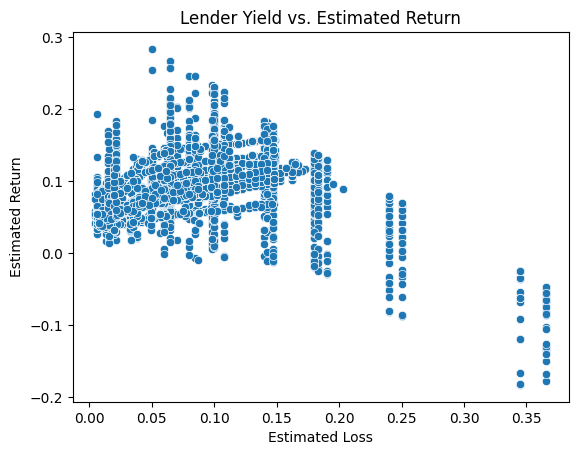

In [6]:
sns.scatterplot(data=df, x="EstimatedLoss", y="EstimatedReturn")

plt.title("Lender Yield vs. Estimated Return")
plt.xlabel("Estimated Loss")
plt.ylabel("Estimated Return")

## (Visualization 3)

> Based on the scatterplots, there is a difference in borrower rates for various employment statuses, but there is not much in the way of trend between loan sizes and borrower rates. However, some of the employment statuses, such as full-time and employed borrowers, have tightly clustered data points and are thus more common among loan applicants.

> Within each of these loan categories, borrower rates are fairly spread out across loan sizes but trend lower as loan sizes are larger—i.e., as loan sizes increase, borrower rates can be slightly lower. That could be taken as suggesting borrowers making larger loans have superior loan terms, perhaps as a reflection of superior credit profiles or financial security.

> In contrast, self- and unemployed borrowers have a more widespread pattern in which borrower rates are still fairly high for lower loan sizes. It may be that lenders are treating them as riskier and are charging them relatively high borrower rates across loan sizes.

Text(0.5, 1.05, 'Borrower Rate by Loan Amount and Employment Status')

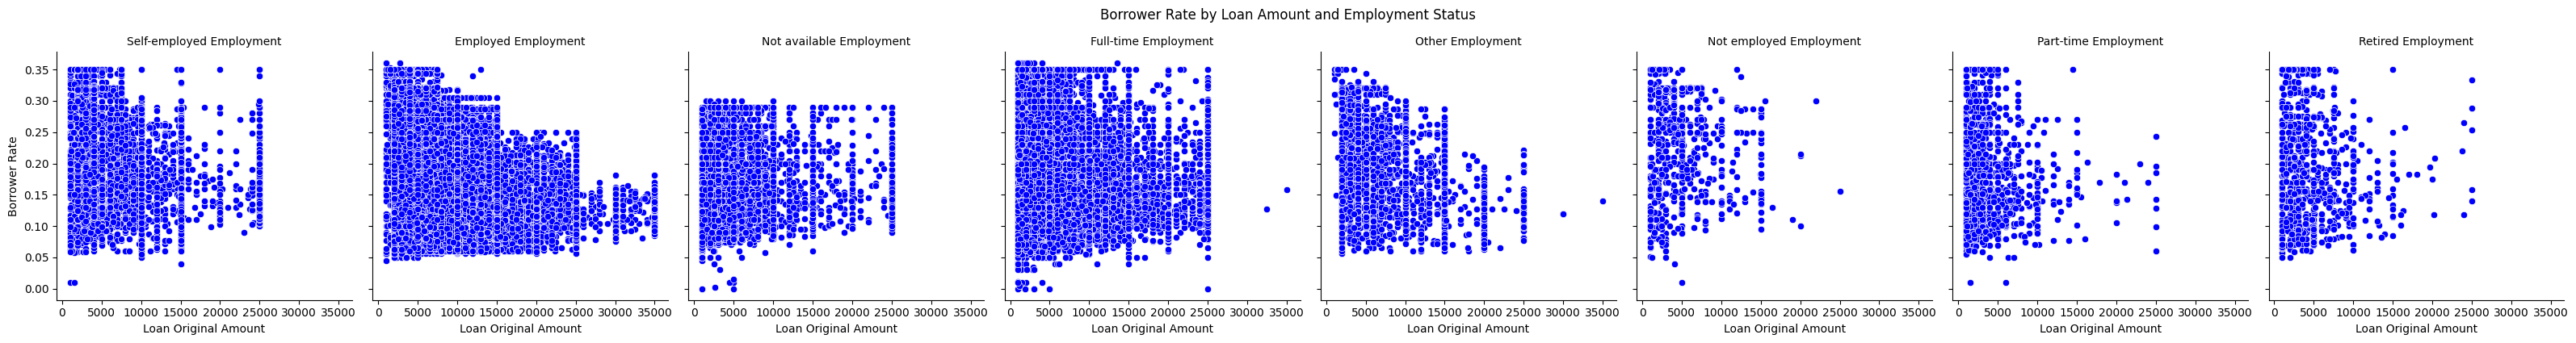

In [7]:
facet_plot = sns.FacetGrid(df, col="EmploymentStatus", height=4, aspect=1)
facet_plot.map(sns.scatterplot, "LoanOriginalAmount", "BorrowerRate", color='blue')
facet_plot.set_axis_labels("Loan Original Amount", "Borrower Rate")
facet_plot.set_titles(col_template="{col_name} Employment")
facet_plot.fig.suptitle("Borrower Rate by Loan Amount and Employment Status", y=1.05)